In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances_argmin
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False) 

In [2]:
enemy_radius = 1
robot_radius = 2
offset = 0.2
max_radius = enemy_radius + robot_radius + offset
# offset is margin by which we avoid the enemy robot


In [3]:
a = np.array([[1,0,0,0,0],[0,1,0,0,0],[1,5,25,125,625],[0,1,10,75,500],[1,2,4,8,16]])
b = np.array([3,0,9,0,1])
x = np.linalg.solve(a, b)


a = np.array([[1,0,0,0,0],[0,1,0,0,0],[1,5,25,125,625],[0,1,10,75,500],[1,2,4,8,16]])
b = np.array([0,0,5,0,2.5])
y = np.linalg.solve(a, b)


t = np.linspace(0, 5, num=50)
yt = y[0] + y[1]*(t) + y[2]*(t**2) + y[3]*(t**3) + y[4]*(t**4)
xt = x[0] + x[1]*(t) + x[2]*(t**2) + x[3]*(t**3) + x[4]*(t**4)


In [4]:
from numpy import arctan,cos,sin
def slopeFromPoints(P,Q): 
    a = Q[1] - P[1] 
    b = P[0] - Q[0]  
    c = a*(P[0]) + b*(P[1])  
    return -a/b

def get_points(slope, x,y, d):
    a = arctan(slope)
    x1 = x - d*cos(a)
    x2 = x + d*cos(a)
    y1 = y - d*sin(a)
    y2 = y + d*sin(a)
    return x1,y1,x2,y2

In [5]:
xy = list(zip(xt,yt))
xy = np.asarray(xy)


newlabels = pairwise_distances_argmin([[5,4]], np.asarray(xy))
print(xy[newlabels])
slope = slopeFromPoints(np.array([5,4]), np.asarray(xy[newlabels][0]))
print(slope)

x1,y1,x2,y2 = get_points(slope, 5,4,2*max_radius)


[[4.83719746 4.54382433]]
-3.340392268334453


In [6]:
x1,y1,x2,y2 = round(x1),round(y1),round(x2),round(y2)
print(x1,y1,x2,y2)
x_margin = np.linspace(x1,x2,50)
y_margin = np.linspace(y1,y2,50)

3.0 10.0 7.0 -2.0


In [7]:
xt=[]
yt =[]
for x,y in zip(x_margin,y_margin):
    a = np.array([[1,0,0,0,0],    jx = 6*x[3] + 24*x[4]*(t)
    jy = 6*y[3] + 24*y[4]*(t)[0,1,0,0,0],[1,5,25,125,625],[1,2,4,8,16],[1,3,9,27,81]])
    b = np.array([3,0,9,1,x])
    xt.append(np.linalg.solve(a, b))


    a = np.array([[1,0,0,0,0],[0,1,0,0,0],[1,5,25,125,625],[1,2,4,8,16],[1,3,9,27,81]])
    b = np.array([0,0,5,2.5,y])
    yt.append(np.linalg.solve(a, b))
xt = np.asarray(xt)
yt = np.asarray(yt)
print(xt.shape)

(50, 5)


In [8]:
X =[]
Y=[]
t = np.linspace(0, 5, num=50)
for x,y in zip(xt,yt):
    Y.append(y[0] + y[1]*(t) + y[2]*(t**2) + y[3]*(t**3) + y[4]*(t**4))
    X.append(x[0] + x[1]*(t) + x[2]*(t**2) + x[3]*(t**3) + x[4]*(t**4))
X = np.asarray(X)
Y = np.asarray(Y)
print(X.shape)

(50, 50)


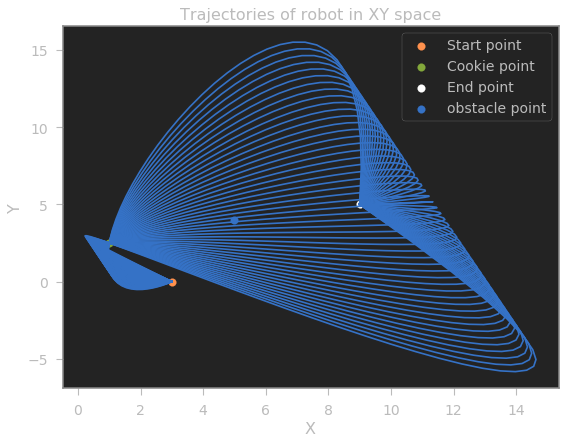

In [9]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for x,y in zip(X,Y):
    plt.plot(x,y,color ='b')
plt.scatter(3,0,c='y',label = 'Start point')
plt.scatter(1,2.5,c='g',label = 'Cookie point')
plt.scatter(9,5,c='w',label = 'End point')
plt.scatter(5,4,label = 'obstacle point')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Trajectories of robot in XY space")
plt.legend()

In [10]:
valid_traj = []
coeffx = []
coeffy = []
i = 0
for x,y in zip(X,Y):
    temp = list(zip(x,y))
    index = pairwise_distances_argmin([[5,4]], temp)
    if(np.hypot((temp[index[0]][0] - 5),(temp[index[0]][1] - 4)) > max_radius):
        valid_traj.append(temp)
        coeffx.append(xt[i])
        coeffy.append(yt[i])
        i += 1
valid_traj = np.asarray(valid_traj)
coeffx = np.asarray(coeffx)
coeffy = np.asarray(coeffy)
print(coeffx.shape)

(16, 5)


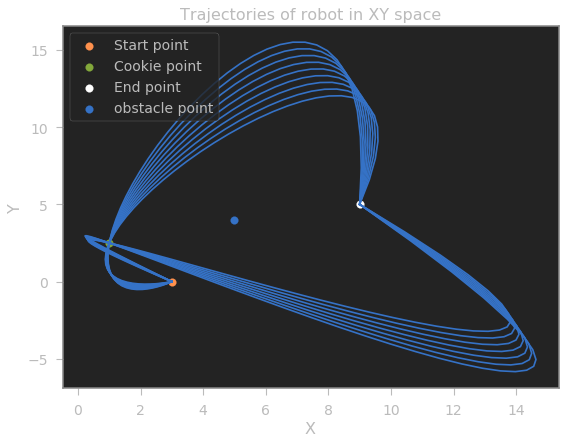

In [11]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
for ele in valid_traj:
    plt.plot(ele[:,0],ele[:,1],color ='b')
plt.scatter(3,0,c='y',label = 'Start point')
plt.scatter(1,2.5,c='g',label = 'Cookie point')
plt.scatter(9,5,c='w',label = 'End point')
plt.scatter(5,4,label = 'obstacle point')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Trajectories of robot in XY space")
plt.legend(loc = "upper left")

[0]


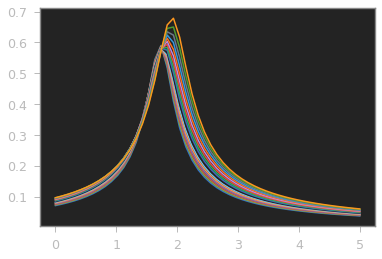

In [62]:
mean_jerk =[]
for x,y in zip(coeffx,coeffy):
    jx = 6*x[3] + 24*x[4]*(t**1)
    jy = 6*y[3] + 24*y[4]*(t**1)
    jerk = 1/np.hypot(jx,jy)
    mean_jerk.append(np.mean(abs(jerk)))
    plt.plot(t,jerk)
    
mean_jerk = np.asarray(mean_jerk)
index = np.where(mean_jerk == np.amin(mean_jerk))
print(index[0])

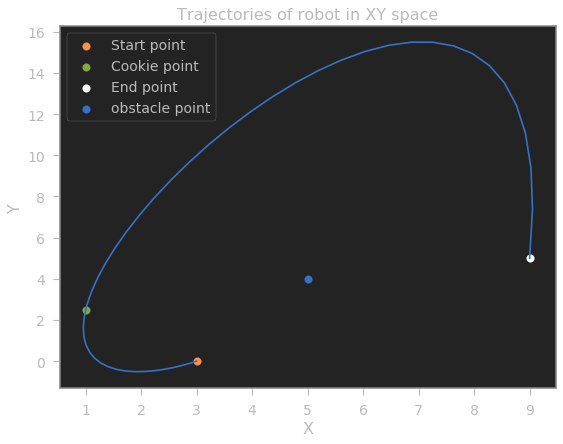

In [63]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(valid_traj[index[0][0]][:,0],valid_traj[index[0][0]][:,1],color ='b')
plt.scatter(3,0,c='y',label = 'Start point')
plt.scatter(1,2.5,c='g',label = 'Cookie point')
plt.scatter(9,5,c='w',label = 'End point')
plt.scatter(5,4,label = 'obstacle point')

plt.xlabel('X')
plt.ylabel('Y')
plt.title("Trajectories of robot in XY space")
plt.legend(loc = "upper left")